In [1]:
import numpy as np
from common.layers import MatMul
from common.util import preprocess, create_contexts_target, convert_one_hot

In [2]:
c = np.array([1, 0, 0, 0, 0, 0, 0])
W = np.random.randn(7, 3)
layer = MatMul(W)
h = layer.forward(c)
h

array([-0.5042959 ,  1.04814654,  1.13579744])

## CBOWモデルの推論処理

In [3]:
# サンプルのコンテキストデータ
c0 = np.array([1, 0, 0, 0, 0, 0, 0])
c1 = np.array([0, 0, 1, 0, 0, 0, 0])

# 重みの初期化
W_in = np.random.randn(7, 3)
W_out = np.random.randn(3, 7)

# レイヤの生成
in_layer0 = MatMul(W_in)
in_layer1 = MatMul(W_in)
out_layer = MatMul(W_out)

# 順伝播
h0 = in_layer0.forward(c0)
h1 = in_layer1.forward(c1)
h = 0.5 * (h0 + h1)
s = out_layer.forward(h)
s

array([ 0.3769535 , -1.1715524 ,  1.11683391,  0.69528581, -0.12091222,
       -0.326882  , -0.53766906])

In [4]:
text = "You say goodbye and I say hello."
corpus, word_to_id, id_to_word = preprocess(text)
print(corpus)
print(id_to_word)

[0 1 2 3 4 1 5 6]
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


In [5]:
contexts, target = create_contexts_target(corpus, window_size=1)
contexts, target

(array([[0, 2],
        [1, 3],
        [2, 4],
        [3, 1],
        [4, 5],
        [1, 6]]),
 array([1, 2, 3, 4, 1, 5]))

In [6]:
vocab_size = len(word_to_id)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)
target, contexts

(array([[0, 1, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0],
        [0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0]]),
 array([[[1, 0, 0, 0, 0, 0, 0],
         [0, 0, 1, 0, 0, 0, 0]],
 
        [[0, 1, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0]],
 
        [[0, 0, 1, 0, 0, 0, 0],
         [0, 0, 0, 0, 1, 0, 0]],
 
        [[0, 0, 0, 1, 0, 0, 0],
         [0, 1, 0, 0, 0, 0, 0]],
 
        [[0, 0, 0, 0, 1, 0, 0],
         [0, 0, 0, 0, 0, 1, 0]],
 
        [[0, 1, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 1]]]))

# CBOWモデルでの学習

In [7]:
from common.trainer import Trainer
from common.optimizer import Adam
from cbow.simple_cbow import SimpleCBOW
from common.util import preprocess, create_contexts_target, convert_one_hot

| epoch 1 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 2 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 3 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 4 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 5 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 6 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 7 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 8 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 9 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 10 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 11 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 12 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 13 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 14 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 15 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 16 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 17 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 18 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 19 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 20 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 21 |  iter 1 / 2 | ti

| epoch 369 |  iter 1 / 2 | time 0[s] | loss 0.78
| epoch 370 |  iter 1 / 2 | time 0[s] | loss 0.87
| epoch 371 |  iter 1 / 2 | time 0[s] | loss 0.70
| epoch 372 |  iter 1 / 2 | time 0[s] | loss 0.76
| epoch 373 |  iter 1 / 2 | time 0[s] | loss 0.79
| epoch 374 |  iter 1 / 2 | time 0[s] | loss 0.75
| epoch 375 |  iter 1 / 2 | time 0[s] | loss 0.79
| epoch 376 |  iter 1 / 2 | time 0[s] | loss 0.84
| epoch 377 |  iter 1 / 2 | time 0[s] | loss 0.77
| epoch 378 |  iter 1 / 2 | time 0[s] | loss 0.70
| epoch 379 |  iter 1 / 2 | time 0[s] | loss 0.65
| epoch 380 |  iter 1 / 2 | time 0[s] | loss 0.87
| epoch 381 |  iter 1 / 2 | time 0[s] | loss 0.65
| epoch 382 |  iter 1 / 2 | time 0[s] | loss 0.87
| epoch 383 |  iter 1 / 2 | time 0[s] | loss 0.73
| epoch 384 |  iter 1 / 2 | time 0[s] | loss 0.75
| epoch 385 |  iter 1 / 2 | time 0[s] | loss 0.77
| epoch 386 |  iter 1 / 2 | time 0[s] | loss 0.67
| epoch 387 |  iter 1 / 2 | time 0[s] | loss 0.80
| epoch 388 |  iter 1 / 2 | time 0[s] | loss 0.78


| epoch 746 |  iter 1 / 2 | time 0[s] | loss 0.49
| epoch 747 |  iter 1 / 2 | time 0[s] | loss 0.41
| epoch 748 |  iter 1 / 2 | time 0[s] | loss 0.35
| epoch 749 |  iter 1 / 2 | time 0[s] | loss 0.28
| epoch 750 |  iter 1 / 2 | time 0[s] | loss 0.51
| epoch 751 |  iter 1 / 2 | time 0[s] | loss 0.35
| epoch 752 |  iter 1 / 2 | time 0[s] | loss 0.38
| epoch 753 |  iter 1 / 2 | time 0[s] | loss 0.41
| epoch 754 |  iter 1 / 2 | time 0[s] | loss 0.35
| epoch 755 |  iter 1 / 2 | time 0[s] | loss 0.38
| epoch 756 |  iter 1 / 2 | time 0[s] | loss 0.38
| epoch 757 |  iter 1 / 2 | time 0[s] | loss 0.41
| epoch 758 |  iter 1 / 2 | time 0[s] | loss 0.38
| epoch 759 |  iter 1 / 2 | time 0[s] | loss 0.38
| epoch 760 |  iter 1 / 2 | time 0[s] | loss 0.38
| epoch 761 |  iter 1 / 2 | time 0[s] | loss 0.38
| epoch 762 |  iter 1 / 2 | time 0[s] | loss 0.35
| epoch 763 |  iter 1 / 2 | time 0[s] | loss 0.30
| epoch 764 |  iter 1 / 2 | time 0[s] | loss 0.56
| epoch 765 |  iter 1 / 2 | time 0[s] | loss 0.29


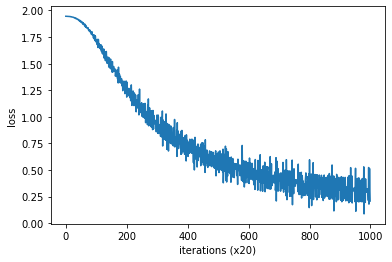

In [8]:
window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = "You say goodbye and I say hello."
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

In [9]:
word_vecs = model.word_vecs

for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])

you [ 0.947307    1.7055558  -0.93326575  1.0610696  -1.0732976 ]
say [-0.5353921  1.2106124  0.4058401 -1.2474157  1.2534654]
goodbye [ 0.9326698  -0.77819073 -0.94336486  1.0368235  -1.0195023 ]
and [-1.5904344   1.1302906   1.5998365  -0.7804598   0.75131196]
i [ 0.9061474  -0.75979006 -0.9320139   1.0289215  -1.023729  ]
hello [ 0.9374758   1.6850166  -0.94398177  1.0663556  -1.0687531 ]
. [ 1.6136345  0.9157026 -1.5658073 -1.2694705  1.2524765]
